### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент:  Яссин Мохамад Аламин
##### Группа:   НКНбд-01-20

## Москва 2023
***

# Вариант №1
Лабораторная работа 3


## Текст задания:
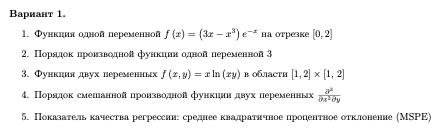

## Решение:

In [1]:
# Все imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


### №1   
Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

In [2]:
def fun1(x):
    return (3*x - x**3)*tf.exp(-x)
segment1 = tf.Variable(np.linspace(0, 2, 100))
tensor1 = fun1(segment1)
max_value = tf.reduce_max(tensor1)
min_value = tf.reduce_min(tensor1)
print("Максимальное значение функции: ", max_value.numpy())
print("Минимальное значение функции: ", min_value.numpy())

Максимальное значение функции:  0.8747106472407123
Минимальное значение функции:  -0.2706705664732254


### №2
Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

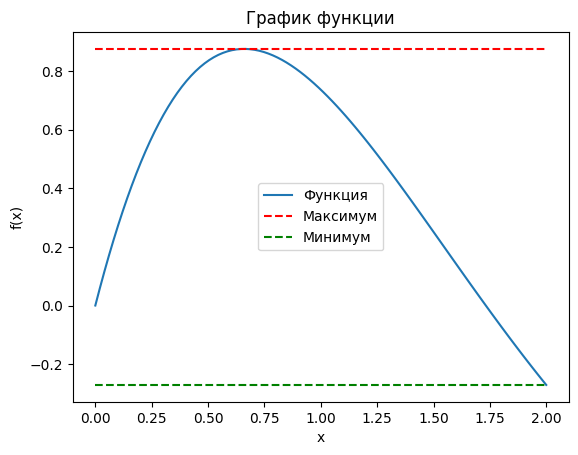

In [3]:
fig, ax = plt.subplots()
ax.plot(segment1, fun1(segment1), label='Функция')

# Добавляем прямые, соответствующие максимальному и минимальному значению функции
ax.plot([0, 2], [max_value, max_value], 'r--', label='Максимум')
ax.plot([0, 2], [min_value, min_value], 'g--', label='Минимум')

# Добавляем подписи осей, заголовок и легенду
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('График функции')
ax.legend()
plt.show()

### №3
Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.



In [4]:
def f_3(x):
    with tf.GradientTape() as tape:
        with tf.GradientTape() as tape2:
            with tf.GradientTape() as tape3:
                y = fun1(x)
            dy_dx = tape3.gradient(y, x)
        d2y_dx2 = tape2.gradient(dy_dx, x)
    d3y_dx3 = tape.gradient(d2y_dx2, x)
    return d3y_dx3

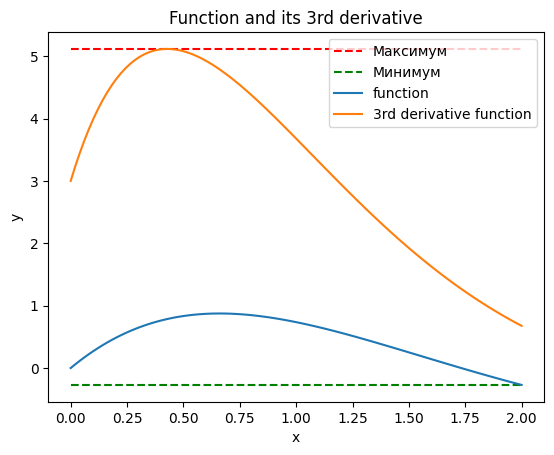

In [5]:
fig, ax = plt.subplots()
y_3 = f_3(segment1)
max_value=tf.reduce_max(y_3)
ax.plot([0, 2], [max_value, max_value], 'r--', label='Максимум')
ax.plot([0, 2], [min_value, min_value], 'g--', label='Минимум')
ax.plot(segment1, fun1(segment1), label="function")
ax.plot(segment1, y_3.numpy(), label="3rd derivative function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Function and its 3rd derivative")
ax.legend()
plt.show()

### №4
Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

In [6]:
def f(x, y):
    return x * tf.math.log(x*y)

In [7]:
x_2 = tf.Variable(np.linspace(1, 2, 50))
y_2 = tf.Variable(np.linspace(1, 2, 50))

#мы используем функцию tf.meshgrid, чтобы создать сетку X и Y, которая представляет собой матрицы, содержащие значения x и y в каждой точке 
X, Y = tf.meshgrid(x_2, y_2)
Z = f(X,Y)
print("Матрица:\n", Z.numpy())
print("Максимальное значение функции:", tf.reduce_max(Z).numpy())
print("Минимальное значение функции:", tf.reduce_min(Z).numpy())

Матрица:
 [[0.         0.02061501 0.04163821 ... 1.31760567 1.35184482 1.38629436]
 [0.02020271 0.04123001 0.06266551 ... 1.35718648 1.39183793 1.42669978]
 [0.04000533 0.06143678 0.08327641 ... 1.39598347 1.43103905 1.46630503]
 ...
 [0.67252789 0.70686796 0.74161622 ... 2.63521134 2.68317554 2.73135015]
 [0.68289068 0.71744223 0.75240197 ... 2.65551394 2.70368963 2.75207572]
 [0.69314718 0.72790805 0.76307711 ... 2.67560831 2.72399332 2.77258872]]
Максимальное значение функции: 2.772588722239781
Минимальное значение функции: 0.0


### №5
Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

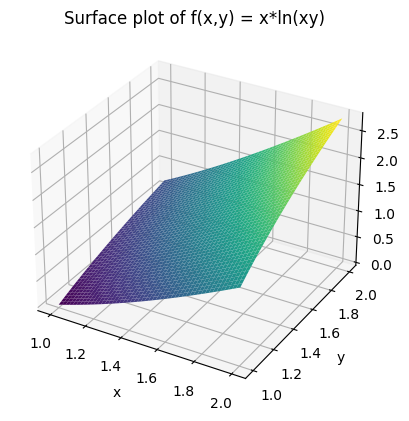

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface plot of f(x,y) = x*ln(xy)')
plt.show()

### №6
Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

In [9]:
def f_mixed(x, y):
    with tf.GradientTape() as t3:
        t3.watch(y)
        with tf.GradientTape() as t2:
            t2.watch(x)
            with tf.GradientTape() as t1:
                t1.watch(x)
                t = x * tf.math.log(x * y)
            g = t1.gradient(t, x)
        h = t2.gradient(g, x)
    l = t3.gradient(h, y)
    return l

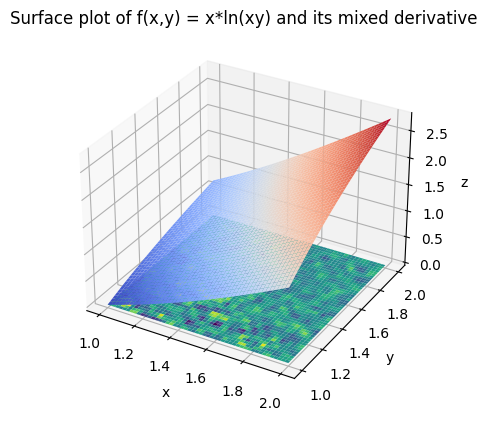

In [10]:
Z_mixed= f_mixed(X,Y)

# Plot the surfaces
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z.numpy(), cmap='coolwarm')
ax.plot_surface(X, Y, Z_mixed.numpy(), cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface plot of f(x,y) = x*ln(xy) and its mixed derivative')
plt.show()

### №7
Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

In [11]:
x_train = tf.constant(np.linspace(0, 2, 100), dtype=tf.float32)
y_train = tf.constant((3*x_train - tf.pow(x_train, 3))*tf.exp(-x_train), dtype=tf.float32)

In [12]:
def mspe(y_true, y_pred):
    return tf.reduce_mean(tf.square((y_true - y_pred) / y_true)) * 100

In [13]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = mspe(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [14]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(tf.constant(1.0), name='weight')
        self.b = tf.Variable(tf.constant(2.0), name='bias')

    def __call__(self, x):
        return self.W * x + self.b

In [15]:
model = Model()
list_w, list_b = [], []
epochs = range(9)
losses = []
for epoch in epochs:
  list_w.append(model.W.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x_train, y_train, learning_rate=0.00999)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=1.00 b=2.00, потери=70.61799
Эпоха  1: w=0.94 b=1.91, потери=69.31606
Эпоха  2: w=0.87 b=1.80, потери=67.76857
Эпоха  3: w=0.80 b=1.69, потери=65.88669
Эпоха  4: w=0.72 b=1.57, потери=63.53060
Эпоха  5: w=0.62 b=1.43, потери=60.46781
Эпоха  6: w=0.52 b=1.27, потери=56.28800
Эпоха  7: w=0.39 b=1.07, потери=50.25101
Эпоха  8: w=0.23 b=0.84, потери=41.50269


### №8
Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля `tf.math`. 

In [16]:
def plot_learning_curve(losses):
    plt.plot(losses)
    plt.title('MSPE на каждой эпохе')
    plt.xlabel('Эпоха')
    plt.ylabel('MSPE')
    plt.show()

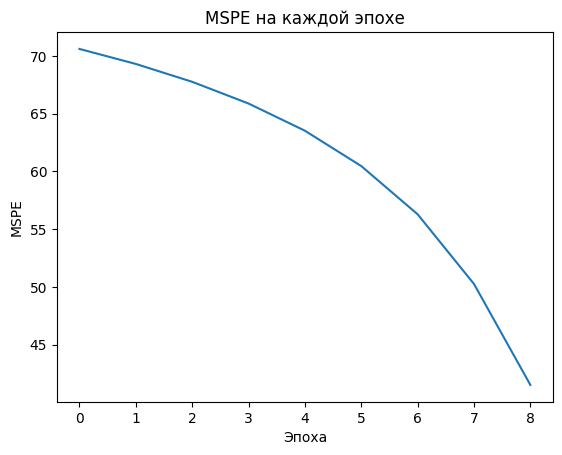

In [17]:
plot_learning_curve(losses)

### №9
Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.   

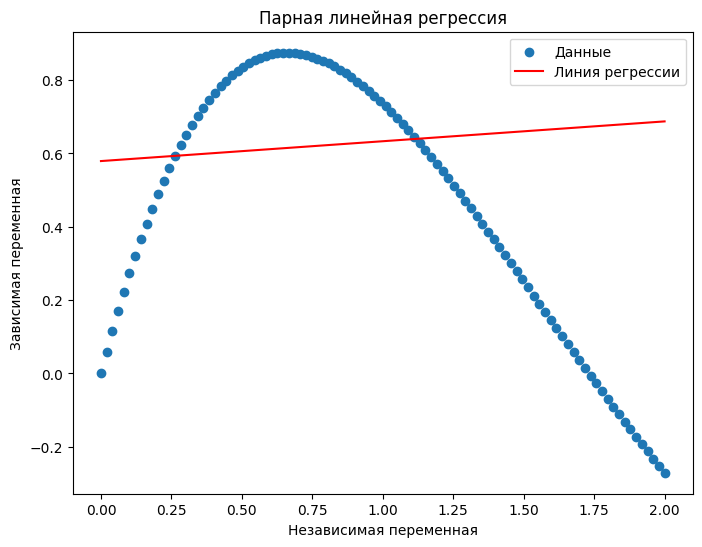

In [18]:
y_pred = model(x_train)
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label='Данные')
plt.plot(x_train, y_pred, label='Линия регрессии', color='r')
plt.xlabel('Независимая переменная')
plt.ylabel('Зависимая переменная')
plt.title('Парная линейная регрессия')
plt.legend()
plt.show()